In [1]:
import pandas as pd
import numpy as np
import spacy
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, confusion_matrix
from sklearn.linear_model import LogisticRegression
import ml_metrics
import re
import matplotlib.pyplot as plt
import itertools

In [26]:
train_data = pd.read_csv('train.csv', header=0)

train_data = train_data.drop(['Date'], axis=1)

train_comments = train_data['Comment']
comment_weight = np.zeros([3947])

badwords = open("badwords.txt", "r")
badMap = dict()
for line in badwords:
    sp = line.strip().lower().split(",")
    if len(sp) == 2:
        badMap[sp[0].strip()]=sp[1].strip()
    else:
        badMap[sp[0].strip()]=sp[0].strip()
        
bm_set = set(badMap.values())
print bm_set    

capitalized = []
exclaim = []
question = []
nonalpha = []

cleanedComments = []

for i in range(3947):
    comment = train_comments[i]
    
    capitalized.append(float(sum(1 for c in comment if c.isupper()))/float(sum(c.isalpha() for c in comment)))
    exclaim.append(comment.count('!'))
    question.append(comment.count('?'))
    
    #preprocessing each comment
    comment = comment.lower()
    
    comment = comment.replace("\2"," ")
    comment = comment.replace("\\n", " ")
    comment = comment.replace("\\t"," ")
    comment = comment.replace("\\xa0"," ")
    comment = comment.replace("\\xc2"," ")
    comment = comment.replace("\\x80", " ")
    comment = comment.replace('"',"")
    
    comment = re.sub(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', r'[URL]', comment) # URL
    
    nonalpha.append(sum(1 for c in comment if not c.isalpha()))
    
    comment = comment.replace("?", "")
    comment = comment.replace(".", " ")
    comment = comment.replace(":"," ")
    comment = comment.replace("\\","")
    comment = comment.replace("-"," ")
    comment = comment.replace(","," ")
    comment = comment.replace(" we're ", " we are ")
    
    comment = comment.replace("'","")
    comment = comment.replace(" & ", " and ")
    comment = comment.replace(";","")
    comment = comment.replace("(","")
    comment = comment.replace(")","")
    comment = comment.replace("<span>","")
    comment = comment.replace("</span>","")
    comment = comment.replace("<strong>","")
    comment = comment.replace("</strong>","")
    comment = comment.replace("<div>","")
    comment = comment.replace("</div>","")
    comment = comment.replace("<br>","")
    comment = comment.replace("</br>","")
    comment = comment.replace("<p>","")
    comment = comment.replace("</p>","")
    comment = comment.replace("<s>","")
    comment = comment.replace("</s>","")
    comment = comment.replace("<i>","")
    comment = comment.replace("</i>","")
    comment = comment.replace("<b>","")
    comment = comment.replace("</b>","")
    comment = comment.replace("<cite>","")
    comment = comment.replace("</cite>","")
    comment = comment.replace("&nbsp","")
    
    
    comment = comment.replace(" u ", " you ")
    comment = comment.replace(" ur ", " your ")
    comment = comment.replace(" didnt ", " did not ")
    comment = comment.replace(" dont ", " do not ")
    comment = comment.replace(" doesnt ", " does not ")
    comment = comment.replace("allinit", "all in it")
    comment = comment.replace("[", "")
    comment = comment.replace("]", "")
    comment = comment.replace("{", "")
    comment = comment.replace("}", "")
    
    comment = comment.replace(" im ", " i am ")
    comment = comment.replace(" hes ", " he is ")
    comment = comment.replace(" shes ", " she is ")
    comment = comment.replace(" ud ", " you would ")
    comment = comment.replace(" youd "," you would ")
    comment = comment.replace(" youre ", " you are ")
    comment = comment.replace(" shouldve ", " should have ")
    comment = comment.replace(" wouldve ", " would have ")
    comment = comment.replace(" couldve ", " could have ")
    comment = comment.replace(" mustve ", " must have ")
    comment = comment.replace(" r ", " are ")
    comment = comment.replace(" isnt ", " is not ")
    comment = comment.replace(" b4 ", " before ")
    comment = comment.replace(" likje ", " like ")
    comment = comment.replace(" lil ", " little ")
    comment = comment.replace(" theyll ", " they will ")
    comment = comment.replace(" cant ", " can not ")
    comment = comment.replace(" hasnt ", " has not ")
    comment = comment.replace(" arent ", " are not ")
    comment = comment.replace(" havent ", " have not ")
    
    for key, value in badMap.items():
        keypadding = " "+ key+" "
        valuepadding = " "+value+" "
        comment = comment.replace(keypadding,valuepadding)
        
    for word in comment.split():
        for badw in bm_set:
            if word == badw:
                comment_weight[i]=comment_weight[i] + 1
                   
    cleanedComments.append(comment)
    
# print comment_weight

cleaned =  pd.Series(cleanedComments)

set(['ejaculate', 'l3i+ch', 'schlong', 'masturbat*', 'schmuck', 'big fat', 'disgusting', 'shut up', 'assclowns', 'jerk', 'assholes', 'jism', 'fat', 'jiss', 'masturbate', 'l3itch', 'fag', 'orifice', 'pimmel', 'clits', 'assclown', 'gullible', 'nigger', 'jizm', 'faen', 'scheiss*', 'ekto', 'porn', 'orgasm', 'pedo', 'bully', 'fucks', 'arschloch', 'kuk', 'jackoff', 'shemale', 'hoorm whore', 'nazis', '*dyke', 'neonazism', 'weirdo', 'sexy', 'wh00r. whore', 'chink', 'filthy-homo', 'imbicile', 'ekrem*', 'whiny', 'eat shit and die', 'crybaby', 'simpleton', 'felcher', 'perse', 'kyrpa*', 'cowardly', 'stink-hole', 'sadist', 'batshit', 'feg', 'crap', 'dirsa', 'puke', 'shits', 'mulkku', 'debauched', 'ball-licker', 'naive', 'helvete', 'ignorant', 'penis', 'kraut', 'simpletons', 'sucks', 'fat ass', "loser's", 'wank', 'fuck', 'coonass', 'libbies', 'foxtards', 'dyke', 'bigot', 'hoe', 'lame', 'cocksucker', 'japs', 'stupidity', 'moron', 'skribz', 'testicle', 'queef*', 'irrational', 'wank*', 'jisim', 'tea ba

In [ ]:
nlp = spacy.load('en_core_web_md')

In [ ]:
insults = train[train.Insult == 1].Comment
noninsults = train[train.Insult == 0].Comment

In [ ]:
def isBadWord(word):
    if word in bm_set:
        return True
    else:
        return False

In [ ]:
docs = [nlp(unicode(comment)) for comment in insults]
nondocs = [nlp(unicode(comment)) for comment in noninsults]

In [ ]:
#check for a form of "be" (are is were etc.), if found, check its children for "you" and a bad word
def model1(doc):
    count = 0
    for token in doc:
        if token.children is None:
            total = 0
        else:
            print token.text, [t for t in token.children]
        if token.lemma_ == 'be':
           # (token.dep_ == 'ROOT' or token.dep_ == 'ccomp') and 
            #print token.text, token.dep_, token.lemma_
            gen = token.children
            child = next(gen,None)
            passed = False
            while child is not None:
                #print child.dep_, child.lemma_
                if child.dep_ == 'nsubj' and child.text.lower() == 'you':
                    passed = True
                    break
                child = next(gen,None)
            if passed:
                gen = token.children
                child = next(gen,None)
                while child is not None:
                    #print child.dep_, child.lemma_
                    if child.dep_ == 'attr' and isBadWord(child.text.lower()):
                            count = count + 1
                    elif child.dep_ == 'acomp' and isBadWord(child.text.lower()):
                            count = count + 1
                    child = next(gen,None)
    return count

In [ ]:
#checks for a bad word, looks at the bad words children for a "you", if no "you", check the childrens children for a "you"
def model2(doc):
    count = 0
    words = set()
    for token in doc:
        #print token.text, [t for t in token.children]
        if isBadWord(token.text.lower()):
           # print token.text, token.dep_, token.lemma_
            gen = token.children
            child = next(gen,None)
            while child is not None:
                #print child.dep_, child.lemma_
                if child.text.lower() == 'you':
                    count = count + 1
                    break
                else:
                    words.add(child.text.lower())
                child = next(gen,None)
        elif token.text.lower() in words:
            gen = token.children
            child = next(gen,None)
            while child is not None:
                if child.text.lower() == 'you':
                    count = count + 1
                    break
                child = next(gen,None)
    return count

In [ ]:
#checks for "you" followed by a bad word
def model3(doc):
    count = 0
    found = 0
    for token in doc:
        #print token.text, [t for t in token.children]
        if token.text.lower() == 'you' and found == 0:
            found = 1
        elif found == 1:
            if(isBadWord(token.text.lower())):
                count = count + 1
            found = 0
    return count

In [ ]:
#check each words children to see if a words children include both "you" and a bad word
def model4(doc):
    count = 0
    foundyou = 0
    foundbad = 0
    for token in doc:
        #print token.text, [t for t in token.children]
        gen = token.children
        child = next(gen,None)
        while child is not None:
            if child.text.lower() == 'you':
                foundyou = 1
            if isBadWord(child.text.lower()):
                foundbad = 1
            if foundyou and foundbad:
                count = count + 1
                foundyou = 0
                foundbad = 0
            child = next(gen,None)
    return count

In [27]:
sentenceLength = []

for i in range (0, 3947):
    sentenceLength.append(len(cleaned[i].split()))
    
    
badNum = []

for i in range(0, 3947):
    num = 0
    for word in cleaned[i].split():
        if word in bm_set:
            num = num + 1
    #for word in bm_set:
     #   if word in cleaned[i]:
      #      num = num + 1
    badNum.append(num)
    
    
you_set = set(["yo", "you", "you're", "your", "yourself", "@"])

you = []

for i in range(0, 3947):
    num = 0
    for word in cleaned[i].split():
        if word in you_set:
            num = num + 1
    you.append(num)
    
are_set = set(["are", "'re"])
are = []
for i in range(0, 3947):
    num = 0
    for word in cleaned[i].split():
        if word in are_set:
            num = num + 1
    are.append(num)
    
    
longest_word = []
for i in range(0, 3947):
    length = 0
    for word in cleaned[i].split():
        if len(word) > length:
            length = len(word)
    longest_word.append(length)
    
percent = []
for i in range(0, 3947):
    percent.append(badNum[i]*1.0/sentenceLength[i])
    
badwords2 = []
for i in range(0, 3947):
    if badNum[i] >= 2:
        badwords2.append(1)
    else:
        badwords2.append(0)
        
percent_you = []
for i in range(0, 3947):
    percent_you.append(you[i]*1.0/sentenceLength[i])
    
percent_are = []
for i in range(0, 3947):
    percent_are.append(are[i]*1.0/sentenceLength[i])
    


In [28]:
testoutput = pd.read_csv('new_youandbadwordsiblings.csv', header=0)
train_data['new_youandbadwordsiblings'] = testoutput['feature']

#testoutput2 = pd.read_csv('test_output.csv', header=0)
#train_data['test_output'] = testoutput['feature']

In [29]:
train_data['word_length'] = sentenceLength
train_data['bad_words_count'] = badNum
train_data['you_count'] = you
train_data['percent_bad'] = percent
#train_data['badwords2'] = badwords2
train_data['uppercase'] = capitalized
train_data['exclaim'] = exclaim
train_data['are'] = are
train_data['question'] = question
train_data['longest_word'] = longest_word
#train_data['percent_you'] = percent_you
#train_data['percent_are'] = percent_are
train_data['nonalpha'] = nonalpha

X_train = train_data.drop(columns=['Comment', 'Insult'])
Y_train = train_data['Insult']

In [31]:
# Decision Tree

clf = DecisionTreeClassifier(min_samples_split=100)
clf.fit(X_train, Y_train)

c_dec = cross_val_score(clf, X_train, Y_train, cv=10)
c_dec.mean()

result = clf.predict_proba(X_train)[:]
test_result = np.asarray(Y_train)

Dec_result = pd.DataFrame(result[:,1])
Dec_result['Predict'] = Dec_result[0] #.map(lambda s: 1 if s >=  0.6 else 0)
Dec_result['testAnswer'] = pd.DataFrame(test_result)

Dec_result['Correct'] = np.where(Dec_result['Predict'] == Dec_result['testAnswer'], 1, 0)

Dec_result['Correct'].mean()


y_score = Dec_result['Predict']
y_t = Dec_result['testAnswer']

#roc_auc_score(y_t, y_score)

print ml_metrics.auc(y_t, y_score)

0.928994783556


In [7]:
# Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train, Y_train)

c_gnb = cross_val_score(gnb, X_train, Y_train, cv=10)
#c_gnb.mean()

result = gnb.predict_proba(X_train)[:]

gnb_result = pd.DataFrame(result[:,1])
gnb_result['Predict'] = gnb_result[0] #.map(lambda s: 1 if s >=  0.6 else 0)
gnb_result['testAnswer'] = pd.DataFrame(test_result)

gnb_result['Correct'] = np.where((gnb_result['Predict'] == gnb_result['testAnswer']), 1, 0)
#print knn_result.head()

#gnb_result['Correct'].mean()

y_score = gnb_result['Predict']
y_t = gnb_result['testAnswer']

print ml_metrics.auc(y_t, y_score)

0.863074103241


In [8]:
# K-Nearest Neighbors

knn = KNeighborsClassifier(n_neighbors = 60)
knn.fit(X_train, Y_train)

c_knn = cross_val_score(knn, X_train, Y_train, cv=10)
#c_knn.mean()

result = knn.predict_proba(X_train)[:]

knn_result = pd.DataFrame(result[:,1])
knn_result['Predict'] = knn_result[0] #.map(lambda s: 1 if s >=  0.6 else 0)
knn_result['testAnswer'] = pd.DataFrame(test_result)

knn_result['Correct'] = np.where((knn_result['Predict'] == knn_result['testAnswer']), 1, 0)
#print knn_result.head()

#knn_result['Correct'].mean()

y_score = knn_result['Predict']
y_t = knn_result['testAnswer']

print ml_metrics.auc(y_t, y_score)

0.868202389341


In [9]:
# Random Forest
Rfclf = RandomForestClassifier()
Rfclf.fit(X_train, Y_train)

c_rf =  cross_val_score(Rfclf, X_train, Y_train, cv=10)
c_rf.mean()

result = Rfclf.predict_proba(X_train)[:]

Rf_result = pd.DataFrame(result[:,1])
Rf_result['Predict'] = Rf_result[0] #.map(lambda s: 1 if s >= 0.6  else 0)
Rf_result['testAnswer'] = pd.DataFrame(test_result)

Rf_result['Correct'] = np.where((Rf_result['Predict'] == Rf_result['testAnswer']), 1, 0)
#print Rf_result.head()

#Rf_result['Correct'].mean()

y_score = Rf_result['Predict']
y_t = Rf_result['testAnswer']

print ml_metrics.auc(y_t, y_score)

0.998907402035


0.9352643518
('new_youandbadwordsiblings', '=', 0.12147189420930998)
('word_length', '=', 0.09686932552483359)
('bad_words_count', '=', 0.04989887205746079)
('you_count', '=', 0.13033376862399343)
('percent_bad', '=', 0.17785982241007234)
('uppercase', '=', 0.11101216306268494)
('exclaim', '=', 0.030962388861254766)
('are', '=', 0.03331770688855648)
('question', '=', 0.034034855070386706)
('longest_word', '=', 0.07060086025830371)
('nonalpha', '=', 0.1436383430331433)
[ 6  7  8  2  9  1  5  0  3 10  4]


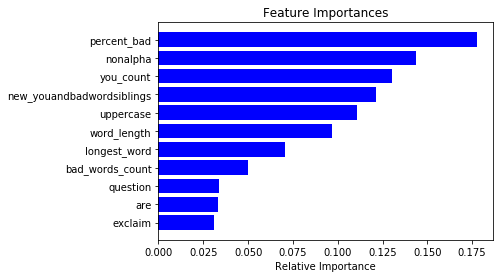

0.9352643518


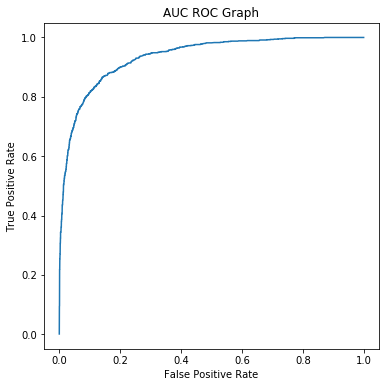

In [10]:
# Gradient Boosting 
gb = GradientBoostingClassifier()
gb.fit(X_train, Y_train)

c_gb = cross_val_score(gb, X_train, Y_train, cv=10)
c_gb.mean()

result = gb.predict_proba(X_train)[:]

gb_result = pd.DataFrame(result[:,1])
gb_result['Predict'] = gb_result[0] #.map(lambda s: 1 if s >= 0.5  else 0)
gb_result['testAnswer'] = pd.DataFrame(test_result)

gb_result['Correct'] = np.where((gb_result['Predict'] == gb_result['testAnswer']), 1, 0)
#print gb_result.head()

gb_result['Correct'].mean()

y_score = gb_result['Predict']
y_t = gb_result['testAnswer']

print ml_metrics.auc(y_t, y_score)

for name, importance in zip(list(X_train), gb.feature_importances_):
    print(name, "=", importance)
    
    
features = np.array(list(X_train))
importances = gb.feature_importances_
indices = np.argsort(importances)

print indices

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')
plt.show()

y_score = gb_result['Predict']
y_t = gb_result['testAnswer']

print ml_metrics.auc(y_t, y_score)

fpr, tpr, thresholds = roc_curve(y_t, y_score, pos_label=1)

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label='ROC curve (area = 0.885)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC ROC Graph')
plt.show()

True Negative: 2721
False Positive: 177
False Negative: 266
True Positive: 783
Confusion matrix, without normalization
[[2721  177]
 [ 266  783]]
Normalized confusion matrix
[[0.94 0.06]
 [0.25 0.75]]


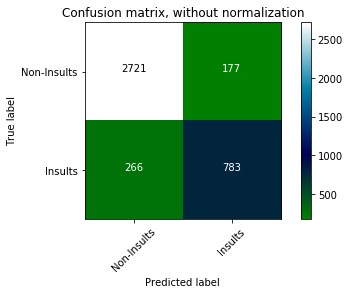

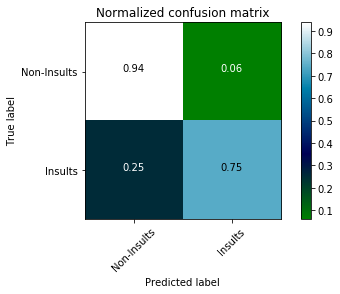

In [11]:
y_score2 = gb_result[0].map(lambda s: 1 if s >= 0.5 else 0)

tn, fp, fn, tp = confusion_matrix(y_t, y_score2).ravel()

print "True Negative: " + str(tn)
print "False Positive: " + str(fp)
print "False Negative: " + str(fn)
print "True Positive: " + str(tp)

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=plt.get_cmap("ocean"))
    plt.title(title)
    plt.colorbar()
    
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="black" if cm[i, j] > thresh else "white")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

    
cnf_matrix = confusion_matrix(y_t, y_score2)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
class_names = ["Non-Insults", "Insults"]
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [12]:
test_data = pd.read_csv('test_with_solutions.csv', header=0)
test_data = test_data.drop(columns=['Date', 'Usage'], axis=1)

capitalized = []
exclaim = []
question = []
nonalpha = []

cleanedComments = []

for i in range(2647):
    comment = test_data.iloc[i, 1]
    #print comment
    
    capitalized.append(float(sum(1 for c in comment if c.isupper()))/float(sum(c.isalpha() for c in comment)))
    exclaim.append(comment.count('!'))
    question.append(comment.count('?'))
    
    #preprocessing each comment
    comment = comment.lower()
    
    comment = comment.replace("\2"," ")
    comment = comment.replace("\\n", " ")
    comment = comment.replace("\\t"," ")
    comment = comment.replace("\\xa0"," ")
    comment = comment.replace("\\xc2"," ")
    comment = comment.replace("\\x80", " ")
    comment = comment.replace('"',"")
    
    comment = re.sub(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', r'[URL]', comment) # URL
    
    nonalpha.append(sum(1 for c in comment if not c.isalpha()))
    
    comment = comment.replace("?", "")
    comment = comment.replace(".", " ")
    comment = comment.replace(":"," ")
    comment = comment.replace("\\","")
    comment = comment.replace("-"," ")
    comment = comment.replace(","," ")
    comment = comment.replace(" we're ", " we are ")
    
    comment = comment.replace("'","")
    comment = comment.replace(" & ", " and ")
    comment = comment.replace(";","")
    comment = comment.replace("(","")
    comment = comment.replace(")","")
    comment = comment.replace("<span>","")
    comment = comment.replace("</span>","")
    comment = comment.replace("<strong>","")
    comment = comment.replace("</strong>","")
    comment = comment.replace("<div>","")
    comment = comment.replace("</div>","")
    comment = comment.replace("<br>","")
    comment = comment.replace("</br>","")
    comment = comment.replace("<p>","")
    comment = comment.replace("</p>","")
    comment = comment.replace("<s>","")
    comment = comment.replace("</s>","")
    comment = comment.replace("<i>","")
    comment = comment.replace("</i>","")
    comment = comment.replace("<b>","")
    comment = comment.replace("</b>","")
    comment = comment.replace("<cite>","")
    comment = comment.replace("</cite>","")
    comment = comment.replace("&nbsp","")
    
    
    comment = comment.replace(" u ", " you ")
    comment = comment.replace(" ur ", " your ")
    comment = comment.replace(" didnt ", " did not ")
    comment = comment.replace(" dont ", " do not ")
    comment = comment.replace(" doesnt ", " does not ")
    comment = comment.replace("allinit", "all in it")
    comment = comment.replace("[", "")
    comment = comment.replace("]", "")
    comment = comment.replace("{", "")
    comment = comment.replace("}", "")
    
    comment = comment.replace(" im ", " i am ")
    comment = comment.replace(" hes ", " he is ")
    comment = comment.replace(" shes ", " she is ")
    comment = comment.replace(" ud ", " you would ")
    comment = comment.replace(" youd "," you would ")
    comment = comment.replace(" youre ", " you are ")
    comment = comment.replace(" shouldve ", " should have ")
    comment = comment.replace(" wouldve ", " would have ")
    comment = comment.replace(" couldve ", " could have ")
    comment = comment.replace(" mustve ", " must have ")
    comment = comment.replace(" r ", " are ")
    comment = comment.replace(" isnt ", " is not ")
    comment = comment.replace(" b4 ", " before ")
    comment = comment.replace(" likje ", " like ")
    comment = comment.replace(" lil ", " little ")
    comment = comment.replace(" theyll ", " they will ")
    comment = comment.replace(" cant ", " can not ")
    comment = comment.replace(" hasnt ", " has not ")
    comment = comment.replace(" arent ", " are not ")
    comment = comment.replace(" havent ", " have not ")
    
    for key, value in badMap.items():
        keypadding = " "+ key+" "
        valuepadding = " "+value+" "
        comment = comment.replace(keypadding,valuepadding)
    
                   
    cleanedComments.append(comment)
    
# print comment_weight

cleaned =  pd.Series(cleanedComments)

In [13]:
sentenceLength = []

for i in range (0, 2647):
    sentenceLength.append(len(cleaned[i].split()))
    
    
badNum = []

for i in range(0, 2647):
    num = 0
    for word in cleaned[i].split():
        if word in bm_set:
            num = num + 1
    #for word in bm_set:
        #if word in cleaned[i]:
            #num = num + 1
    badNum.append(num)
    
you_set = set(["yo", "you", "you're", "your", "yourself", "@"])

you = []

for i in range(0, 2647):
    num = 0
    for word in cleaned[i].split():
        if word in you_set:
            num = num + 1
    you.append(num)
    
are_set = set(["are", "'re"])
are = []
for i in range(0, 2647):
    num = 0
    for word in cleaned[i].split():
        if word in are_set:
            num = num + 1
    are.append(num)
    
longest_word = []
for i in range(0, 2647):
    length = 0
    for word in cleaned[i].split():
        if len(word) > length:
            length = len(word)
    longest_word.append(length)
    
percent = []
for i in range(0, 2647):
    num = 0.0
    percent.append(badNum[i]*1.0/sentenceLength[i])
    
percent_you = []
for i in range(0, 2647):
    percent_you.append(you[i]*1.0/sentenceLength[i])
    
percent_are = []
for i in range(0, 2647):
    percent_are.append(are[i]*1.0/sentenceLength[i])

In [14]:
testoutput = pd.read_csv('test_Siblings.csv', header=0)
test_data['new_youandbadwordsiblings'] = testoutput['feature']

#testoutput2 = pd.read_csv('test_output.csv', header=0)
#test_data['test_output'] = testoutput2['feature']

In [15]:
test_data['word_length'] = sentenceLength
test_data['bad_words_count'] = badNum
test_data['you_count'] = you
test_data['percent_bad'] = percent
test_data['uppercase'] = capitalized
test_data['exclaim'] = exclaim
test_data['are'] = are
test_data['question'] = question
test_data['longest_word'] = longest_word
#test_data['percent_you'] = percent_you
#test_data['percent_are'] = percent_are
test_data['nonalpha'] = nonalpha

X_test = test_data.drop(columns=['Comment', 'Insult'])
Y_test = test_data['Insult']

0.861640236256


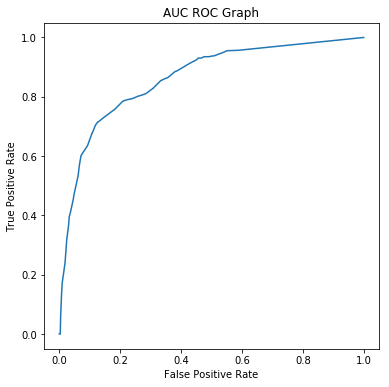

In [25]:
# Decision Tree

clf = DecisionTreeClassifier(min_samples_split=100)
clf.fit(X_train, Y_train)

c_dec = cross_val_score(clf, X_train, Y_train, cv=10)
c_dec.mean()

result = clf.predict_proba(X_test)[:]
test_result = np.asarray(Y_test)

Dec_result = pd.DataFrame(result[:,1])
#Dec_result['Predict'] = Dec_result[0].map(lambda s: 1 if s >=  0.4 else 0)
Dec_result['Predict'] = Dec_result[0]
Dec_result['testAnswer'] = pd.DataFrame(test_result)

Dec_result['Correct'] = np.where(Dec_result['Predict'] == Dec_result['testAnswer'], 1, 0)

#for i in range(0, 2647):
   #if Dec_result['Predict'][i] <= 0.5 and Dec_result['testAnswer'][i] == 1:
        #print test_data.iat[i, 1] + "\n\n"


y_score = Dec_result['Predict']
y_t = Dec_result['testAnswer']

print ml_metrics.auc(y_t, y_score)

fpr, tpr, thresholds = roc_curve(y_t, y_score, pos_label=1)

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label='ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC ROC Graph')
plt.show()

In [17]:
# Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train, Y_train)

c_gnb = cross_val_score(gnb, X_train, Y_train, cv=10)
#c_gnb.mean()

result = gnb.predict_proba(X_test)[:]

gnb_result = pd.DataFrame(result[:,1])
gnb_result['Predict'] = gnb_result[0] #.map(lambda s: 1 if s >=  0.6 else 0)
gnb_result['testAnswer'] = pd.DataFrame(test_result)

#gnb_result['Correct'] = np.where((knn_result['Predict'] == knn_result['testAnswer']), 1, 0)
#print knn_result.head()

#gnb_result['Correct'].mean()

y_score = gnb_result['Predict']
y_t = gnb_result['testAnswer']

print ml_metrics.auc(y_t, y_score)

0.830806973079


In [18]:
# K-Nearest Neighbors

knn = KNeighborsClassifier(n_neighbors = 60)
knn.fit(X_train, Y_train)

c_knn = cross_val_score(knn, X_train, Y_train, cv=10)
#c_knn.mean()

result = knn.predict_proba(X_test)[:]

knn_result = pd.DataFrame(result[:,1])
knn_result['Predict'] = knn_result[0] #.map(lambda s: 1 if s >=  0.6 else 0)
knn_result['testAnswer'] = pd.DataFrame(test_result)

knn_result['Correct'] = np.where((knn_result['Predict'] == knn_result['testAnswer']), 1, 0)
#print knn_result.head()

#knn_result['Correct'].mean()

y_score = knn_result['Predict']
y_t = knn_result['testAnswer']

print ml_metrics.auc(y_t, y_score)

0.822781108349


In [19]:
# Random Forest
Rfclf = RandomForestClassifier()
Rfclf.fit(X_train, Y_train)

c_rf =  cross_val_score(Rfclf, X_train, Y_train, cv=10)
c_rf.mean()

result = Rfclf.predict_proba(X_test)[:]

Rf_result = pd.DataFrame(result[:,1])
Rf_result['Predict'] = Rf_result[0] #.map(lambda s: 1 if s >= 0.6  else 0)
Rf_result['testAnswer'] = pd.DataFrame(test_result)

Rf_result['Correct'] = np.where((Rf_result['Predict'] == Rf_result['testAnswer']), 1, 0)
#print Rf_result.head()

#Rf_result['Correct'].mean()

y_score = Rf_result['Predict']
y_t = Rf_result['testAnswer']

print ml_metrics.auc(y_t, y_score)

0.847457614602


0.884635579364


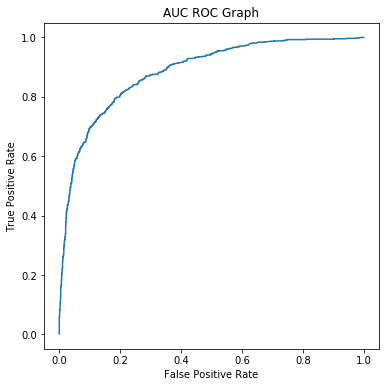

In [20]:
# Gradient Boosting 
gb = GradientBoostingClassifier()
gb.fit(X_train, Y_train)

c_gb = cross_val_score(gb, X_train, Y_train, cv=10)
c_gb.mean()

result = gb.predict_proba(X_test)[:]

gb_result = pd.DataFrame(result[:,1])
gb_result['Predict'] = gb_result[0] #.map(lambda s: 1 if s >= 0.4  else 0)
gb_result['testAnswer'] = pd.DataFrame(test_result)

gb_result['Correct'] = np.where((gb_result['Predict'] == gb_result['testAnswer']), 1, 0)
#print gb_result

gb_result['Correct'].mean()

y_score = gb_result['Predict']
y_t = gb_result['testAnswer']

print ml_metrics.auc(y_t, y_score)

fpr, tpr, thresholds = roc_curve(y_t, y_score, pos_label=1)

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label='ROC curve (area = 0.885)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC ROC Graph')
plt.show()

True Negative: 1818
False Positive: 136
False Negative: 259
True Positive: 434
Confusion matrix, without normalization
[[1818  136]
 [ 259  434]]
Normalized confusion matrix
[[0.93 0.07]
 [0.37 0.63]]


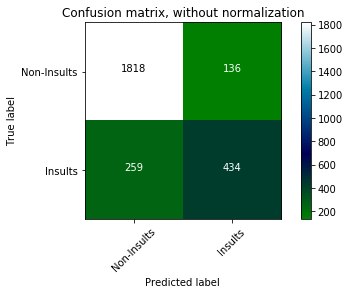

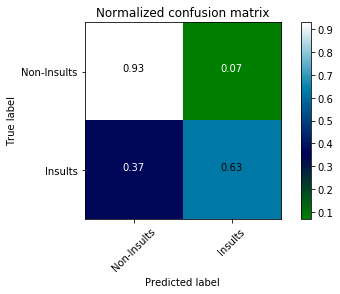

In [21]:
y_score2 = gb_result[0].map(lambda s: 1 if s >= 0.5 else 0)

tn, fp, fn, tp = confusion_matrix(y_t, y_score2).ravel()

print "True Negative: " + str(tn)
print "False Positive: " + str(fp)
print "False Negative: " + str(fn)
print "True Positive: " + str(tp)

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=plt.get_cmap("ocean"))
    plt.title(title)
    plt.colorbar()
    
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="black" if cm[i, j] > thresh else "white")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

    
cnf_matrix = confusion_matrix(y_t, y_score2)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
class_names = ["Non-Insults", "Insults"]
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

0.874640911233


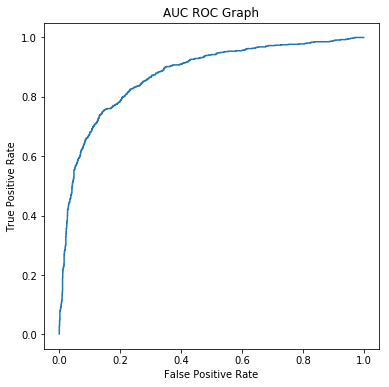

In [22]:
# Logistic Regression

lg = LogisticRegression()
lg.fit(X_train, Y_train)

result = lg.predict_proba(X_test)[:]
test_result = np.asarray(Y_test)

lg_result = pd.DataFrame(result[:,1])
#Dec_result['Predict'] = Dec_result[0].map(lambda s: 1 if s >=  0.4 else 0)
lg_result['Predict'] = lg_result[0]
lg_result['testAnswer'] = pd.DataFrame(test_result)

lg_result['Correct'] = np.where(lg_result['Predict'] == lg_result['testAnswer'], 1, 0)

#for i in range(0, 2647):
   #if Dec_result['Predict'][i] <= 0.5 and Dec_result['testAnswer'][i] == 1:
        #print test_data.iat[i, 1] + "\n\n"


y_score = lg_result['Predict']
y_t = lg_result['testAnswer']

print ml_metrics.auc(y_t, y_score)


fpr, tpr, thresholds = roc_curve(y_t, y_score, pos_label=1)

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label='ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC ROC Graph')
plt.show()